# Student Attrition Model

Given the dataset of Clearwater State University's student information, a column contains data about student's early attrition is taken as target and an end-to-end machine learning model is built using 'Random Forest Classification' algorithm which has accuracy of 84%.

In [1]:
#Importing the neccessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Acquisition:

In [2]:
#Getting the data from excel sheet as dataframe

df = pd.read_excel('../data/Student_Attrition_Data.xlsx', sheet_name='University information')

In [3]:
#Previewing the first five rows in dataframe

df.head()

,STUDENT IDENTIFIER,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_MAJOR,STDNT_MINOR,STDNT_TEST_ENTRANCE1,STDNT_TEST_ENTRANCE2,...,DEGREE_GROUP_CD,DEGREE_GROUP_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED
0,7808615,18,F,BGD 1,Y,N,Undeclared,N,NaN,1150.0,...,B,Bachelors,16,16,14.0,14.0,0,0,0,0.0
1,7830063,19,F,BGD 1,N,N,Undeclared,N,26.0,NaN,...,B,Bachelors,18,18,18.0,18.0,570000,1355760,785760,459300.0
2,7847538,18,M,BGD 1,Y,N,Mathematics,N,NaN,1020.0,...,B,Bachelors,15,15,14.0,14.0,0,0,0,0.0
3,8006429,18,M,BGD 1,Y,N,Undeclared,N,NaN,1210.0,...,B,Bachelors,13,13,14.0,14.0,0,0,0,0.0
4,7962680,18,F,BGD 1,Y,N,Art,N,NaN,1200.0,...,B,Bachelors,12,12,12.0,12.0,835920,1355760,519840,278340.0


## Exploratory Data Analysis:

In [4]:
#Getting the number of rows, columns, non-null count and data types of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   STUDENT IDENTIFIER        3400 non-null   int64  
 1   STDNT_AGE                 3400 non-null   int64  
 2   STDNT_GENDER              3400 non-null   object 
 3   STDNT_BACKGROUND          3400 non-null   object 
 4   IN_STATE_FLAG             3400 non-null   object 
 5   INTERNATIONAL_STS         3400 non-null   object 
 6   STDNT_MAJOR               3400 non-null   object 
 7   STDNT_MINOR               3400 non-null   object 
 8   STDNT_TEST_ENTRANCE1      1106 non-null   float64
 9   STDNT_TEST_ENTRANCE2      2492 non-null   float64
 10  STDNT_TEST_ENTRANCE_COMB  2882 non-null   float64
 11  FIRST_TERM                3400 non-null   int64  
 12  CORE_COURSE_NAME_1_F      3400 non-null   object 
 13  CORE_COURSE_GRADE_1_F     3400 non-null   object 
 14  CORE_COU

In [5]:
#Getting statistical inference of the dataframe

df.describe()

,STUDENT IDENTIFIER,STDNT_AGE,STDNT_TEST_ENTRANCE1,STDNT_TEST_ENTRANCE2,STDNT_TEST_ENTRANCE_COMB,FIRST_TERM,SECOND_TERM,RETURNED_2ND_YR,DISTANCE_FROM_HOME,HIGH_SCHL_GPA,FATHER_HI_EDU_CD,MOTHER_HI_EDU_CD,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED
count,3.400000e+03,3400.000000,1106.000000,2492.000000,2882.000000,3400.000000,3400.000000,3400.000000,3375.000000,3347.000000,2968.000000,2911.000000,3400.000000,3400.000000,3194.000000,3191.000000,3.400000e+03,3.400000e+03,3.400000e+03,3.400000e+03
mean,7.897155e+06,17.994118,20.660036,965.092295,997.758501,200777.000000,200871.000000,0.787353,99.825185,3.202738,2.560647,2.571281,13.985882,12.205000,14.285848,12.511125,3.034025e+05,5.515335e+05,3.446899e+05,7.222052e+04
std,8.083421e+04,0.552052,3.234734,209.088633,156.268221,170.001298,170.001298,0.409240,235.196984,0.455337,0.681273,0.611729,1.554286,2.986294,2.104387,3.470492,4.836255e+05,6.064403e+05,7.871878e+05,2.795679e+05
min,7.755837e+06,16.000000,8.000000,350.000000,530.000000,200508.000000,200602.000000,0.000000,0.000000,0.000000,1.000000,1.000000,9.000000,0.000000,2.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,-1.212072e+06
25%,7.827039e+06,18.000000,18.000000,900.000000,910.000000,200608.000000,200702.000000,1.000000,69.000000,2.870000,2.000000,2.000000,13.000000,11.000000,13.000000,11.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.899052e+06,18.000000,20.000000,990.000000,990.000000,200808.000000,200902.000000,1.000000,69.000000,3.200000,3.000000,3.000000,14.000000,13.000000,14.000000,13.000000,0.000000e+00,1.505400e+05,0.000000e+00,0.000000e+00
75%,7.964008e+06,18.000000,22.000000,1100.000000,1110.000000,200908.000000,201002.000000,1.000000,138.000000,3.560000,3.000000,3.000000,15.000000,15.000000,16.000000,15.000000,5.995800e+05,1.192815e+06,3.241800e+05,1.876155e+05
max,8.037098e+06,26.000000,32.000000,1490.000000,1510.000000,201008.000000,201102.000000,1.000000,5932.000000,4.000000,4.000000,4.000000,21.000000,21.000000,23.000000,23.000000,2.124900e+06,2.124900e+06,5.999940e+06,1.632660e+06


<AxesSubplot:>

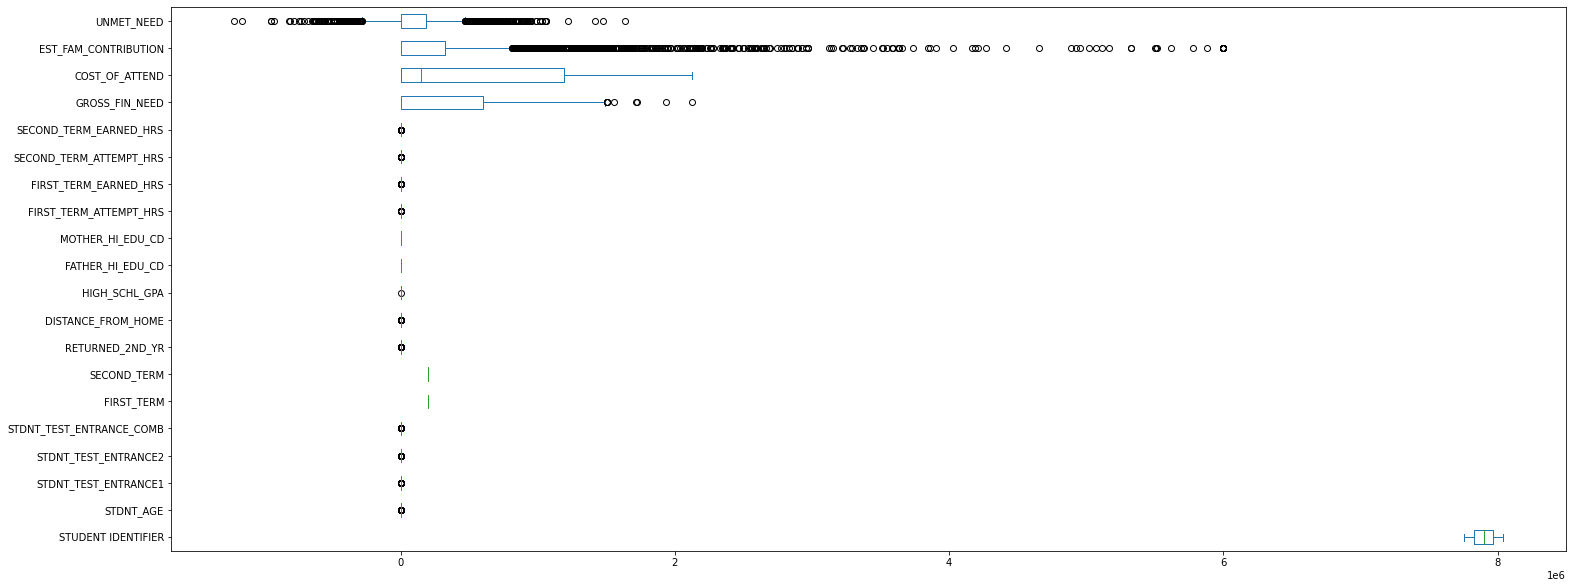

In [6]:
#Plotting 'Box Plot' to find outliers

df.plot(kind='box',vert=False, figsize=(25,10))

<AxesSubplot:xlabel='RETURNED_2ND_YR'>

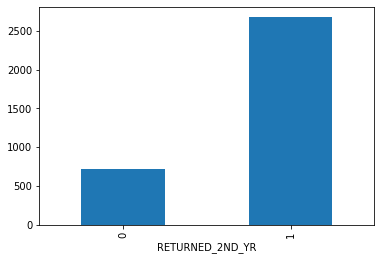

In [7]:
#Bar chart - Comparison of Attrited students(0) vs Returned students(1) 

df.groupby('RETURNED_2ND_YR')['RETURNED_2ND_YR'].count().plot(kind='bar')

In [8]:
#Extracting the attrited students data as new dataframe

attrited_df = df[df['RETURNED_2ND_YR']==0]

In [9]:
#Previewing the attrited dataframe

attrited_df.head()

,STUDENT IDENTIFIER,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_MAJOR,STDNT_MINOR,STDNT_TEST_ENTRANCE1,STDNT_TEST_ENTRANCE2,...,DEGREE_GROUP_CD,DEGREE_GROUP_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED
0,7808615,18,F,BGD 1,Y,N,Undeclared,N,NaN,1150.0,...,B,Bachelors,16,16,14.0,14.0,0,0,0,0.0
11,7884573,18,F,BGD 1,Y,N,Undeclared,N,NaN,1050.0,...,B,Bachelors,16,16,16.0,16.0,0,1189920,5163240,-326880.0
17,8004193,17,M,BGD 1,N,N,Biology,N,NaN,1040.0,...,B,Bachelors,14,14,14.0,14.0,1083000,1324500,241500,476580.0
23,8007842,18,F,BGD 1,Y,N,Pre-Nursing,N,NaN,580.0,...,B,Bachelors,15,15,15.0,15.0,0,0,0,0.0
36,7799972,18,F,BGD 1,Y,N,Undeclared,N,NaN,620.0,...,B,Bachelors,18,18,14.0,14.0,0,0,0,0.0


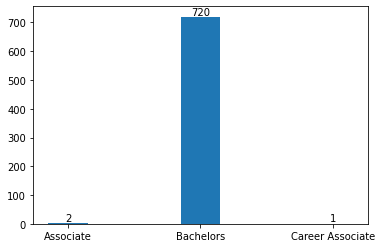

In [10]:
#Comparison: Degree vs Attrition rate

s = attrited_df.groupby('DEGREE_GROUP_DESC')['RETURNED_2ND_YR'].count()

ax = plt.bar(s.keys(),s.values, width = 0.3)

for i in range(3):
    plt.annotate(str(s.values[i]),xy=(s.keys()[i],s.values[i]), ha='center', va='bottom')

plt.show()

#Students who enrolled for the bachelors degree attrit the most.

<AxesSubplot:ylabel='RETURNED_2ND_YR'>

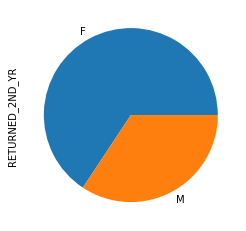

In [11]:
#Comparison: Gender vs Attrition rate

attrited_df.groupby('STDNT_GENDER')['RETURNED_2ND_YR'].count().plot(kind='pie')

#Female students has more attrition rate than male students.

<AxesSubplot:ylabel='STDNT_AGE'>

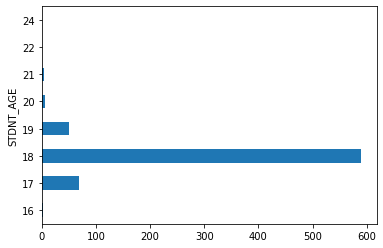

In [12]:
#Comparison: Age vs Attrition rate

attrited_df.groupby('STDNT_AGE')['RETURNED_2ND_YR'].count().plot(kind='barh')

#Students whose age is less than or equal to 18 attrits more.

<AxesSubplot:xlabel='STDNT_BACKGROUND'>

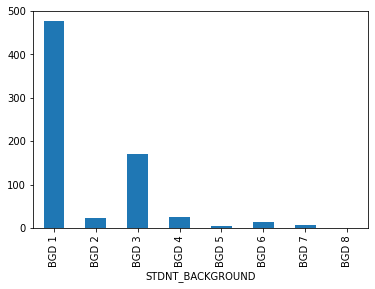

In [13]:
#Comparison: Student background vs Attrition rate

attrited_df.groupby('STDNT_BACKGROUND')['RETURNED_2ND_YR'].count().plot(kind='bar')

#BGD 1 and BGD 3 has more attrition.

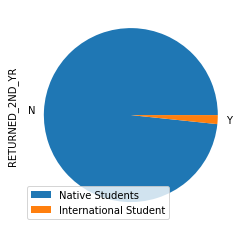

In [14]:
#Comparison: International students vs Attrition rate

ax = attrited_df.groupby('INTERNATIONAL_STS')['RETURNED_2ND_YR'].count().plot(kind='pie')
ax.legend(loc = 3, labels = ['Native Students', 'International Student'])

#Only few international students drops out.

<AxesSubplot:ylabel='STDNT_MAJOR'>

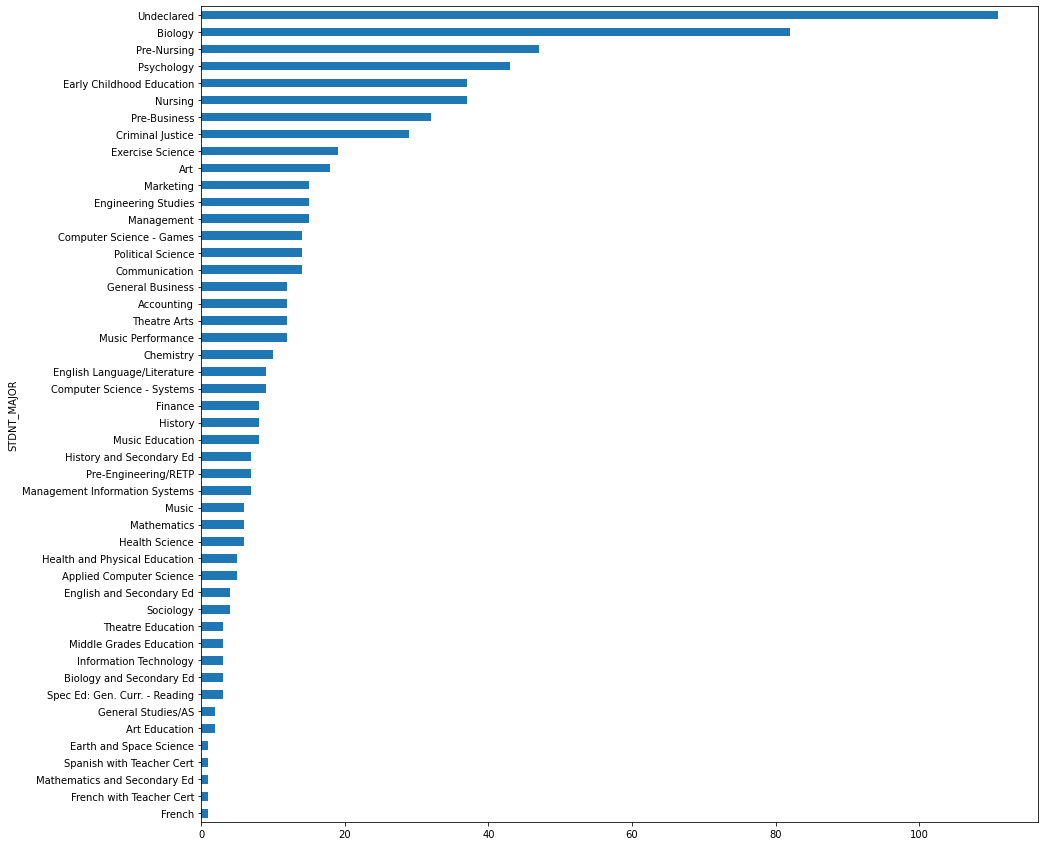

In [15]:
#Department wise attrition rate

attrited_df.groupby('STDNT_MAJOR')['RETURNED_2ND_YR'].count().sort_values().plot(kind='barh',figsize=(15,15))

#Biology, Pre-Nursing, Psychology has more attrition rate.

<AxesSubplot:xlabel='HOUSING_STS'>

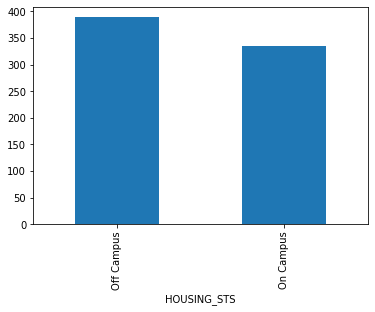

In [16]:
#Comparison: Housing status vs Attrition rate

attrited_df.groupby('HOUSING_STS')['RETURNED_2ND_YR'].count().plot(kind='bar')

#Off campus students drops out more.

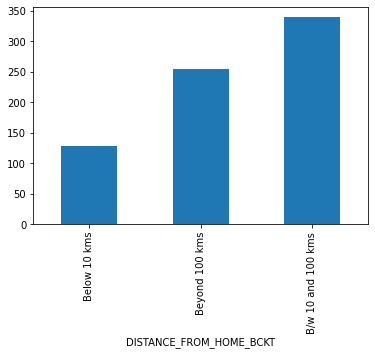

In [18]:
#Comparison: Distance from home vs Attrition rate

def dis_check(DISTANCE_FROM_HOME):
    if DISTANCE_FROM_HOME < 10:
        return 'Below 10 kms'
    elif DISTANCE_FROM_HOME >= 10 and DISTANCE_FROM_HOME < 100:
        return 'B/w 10 and 100 kms'
    else:
        return 'Beyond 100 kms'

attrited_df['DISTANCE_FROM_HOME_BCKT'] = attrited_df.apply(lambda x: dis_check(x['DISTANCE_FROM_HOME']),axis=1)

attrited_df.groupby('DISTANCE_FROM_HOME_BCKT')['RETURNED_2ND_YR'].count().sort_values().plot(kind='bar')

pd.set_option('mode.chained_assignment',None)

#Student who lives at the between 10 and 100 has more attrition.

<AxesSubplot:xlabel='FATHER_HI_EDU_DESC'>

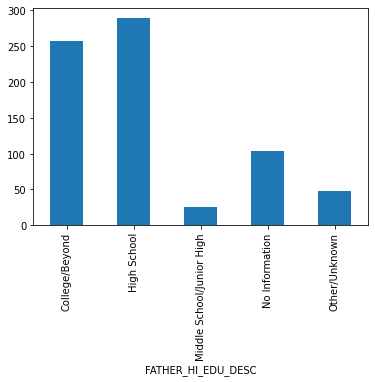

In [19]:
#Comparison: Father's education vs Student attrition

attrited_df.groupby('FATHER_HI_EDU_DESC')['RETURNED_2ND_YR'].count().plot(kind='bar')

#Students whose father went for high school and college has more attrition.

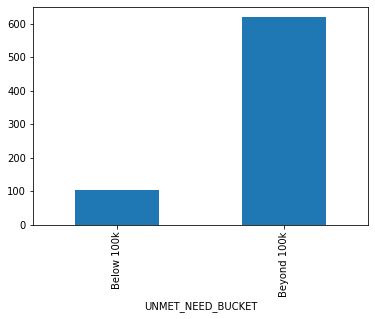

In [20]:
#Comparison: Unmet finanicial need vs Attrition rate

def unmeet_need_check(UNMET_NEED):
    if UNMET_NEED < -100000:
        return 'Below 100k'
    else:
        return 'Beyond 100k'

attrited_df['UNMET_NEED_BUCKET'] = attrited_df.apply(lambda x: unmeet_need_check(x['UNMET_NEED']),axis=1)

attrited_df.groupby('UNMET_NEED_BUCKET')['RETURNED_2ND_YR'].count().plot(kind='bar')

pd.set_option('mode.chained_assignment',None)

#Students whose loan exceeds 100k attrits more.

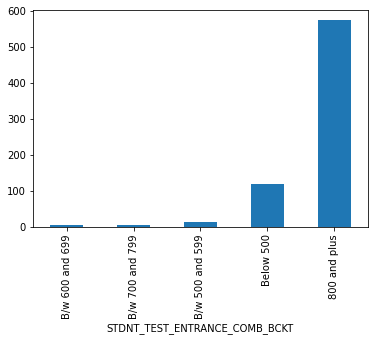

In [21]:
#Comparison: Entrance score vs Attrition rate

def stdnt_entrance_score_check(STDNT_TEST_ENTRANCE_COMB):
    if STDNT_TEST_ENTRANCE_COMB >= 800:
        return '800 and plus'
    elif STDNT_TEST_ENTRANCE_COMB >= 700:
        return 'B/w 700 and 799'
    elif STDNT_TEST_ENTRANCE_COMB >= 600:
        return 'B/w 600 and 699'
    elif STDNT_TEST_ENTRANCE_COMB >= 500:
        return 'B/w 500 and 599'
    else:
        return 'Below 500'

attrited_df['STDNT_TEST_ENTRANCE_COMB_BCKT'] = attrited_df.apply(lambda x: stdnt_entrance_score_check(x['STDNT_TEST_ENTRANCE_COMB']),axis=1)

attrited_df.groupby('STDNT_TEST_ENTRANCE_COMB_BCKT')['RETURNED_2ND_YR'].count().sort_values().plot(kind='bar')

pd.set_option('mode.chained_assignment',None)

#Students who scored 800 and above drops out more.

<AxesSubplot:xlabel='YEAR'>

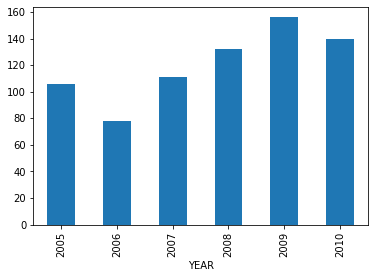

In [22]:
#Comparison: Year vs Attrition rate

attrited_df['YEAR'] = attrited_df['FIRST_TERM'].map(str).replace(['200508','200608','200708','200808','200908','201008'],['2005','2006','2007','2008','2009','2010'])
attrited_df.groupby('YEAR')['RETURNED_2ND_YR'].count().plot(kind='bar')

#The attrition rate is getting increased in recent years.

<AxesSubplot:xlabel='YEAR,HOUSING_STS'>

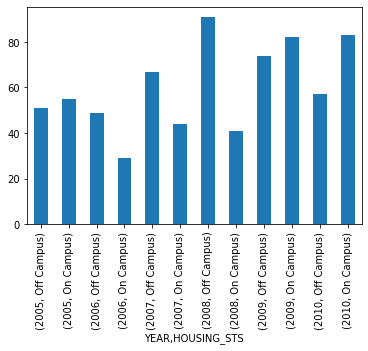

In [23]:
#Comparison: Year and Housing status vs Attrition rate

attrited_df.groupby(['YEAR','HOUSING_STS'])['RETURNED_2ND_YR'].count().plot(kind='bar')

#On campus student attrits more in past two years.

<AxesSubplot:xlabel='YEAR,STDNT_GENDER'>

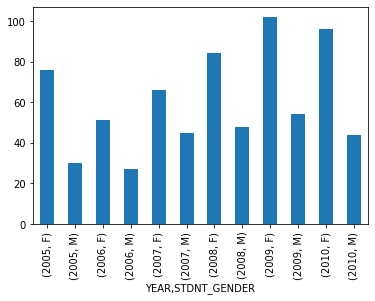

In [24]:
#Comparison: Year and Gender vs Attrition rate

attrited_df.groupby(['YEAR','STDNT_GENDER'])['RETURNED_2ND_YR'].count().plot(kind='bar')

#Female students attrition count is increasing significantly every year.

## Data Preprocessing:

In [25]:
#Percentage of missing values in each columns

pd.DataFrame(round((df.isnull().sum()/df.shape[0])*100,2).sort_values(ascending=False), columns=['Percentage'])

,Percentage
CORE_COURSE_GRADE_6_S,97.62
CORE_COURSE_NAME_6_S,97.62
CORE_COURSE_NAME_6_F,96.24
CORE_COURSE_GRADE_6_F,96.24
CORE_COURSE_GRADE_5_S,86.76
CORE_COURSE_NAME_5_S,86.76
CORE_COURSE_GRADE_5_F,81.03
CORE_COURSE_NAME_5_F,81.03
STDNT_TEST_ENTRANCE1,67.47
CORE_COURSE_NAME_4_S,60.15


In [26]:
#Getting the names of column which has more than 25% null values

df_highnull = pd.DataFrame(round((df.isnull().sum()/df.shape[0])*100).nlargest(16)).reset_index()['index']

In [27]:
#Dropping the columns with more than 25% null values

df.drop(columns=df_highnull.tolist(),axis=1,inplace=True)

In [28]:
#Dropping the ineffectual columns

df.drop(columns=['STUDENT IDENTIFIER','FATHER_HI_EDU_DESC','MOTHER_HI_EDU_DESC','DEGREE_GROUP_DESC','FIRST_TERM','SECOND_TERM'],axis=1,inplace=True)

In [29]:
#Previewing the first five rows in dataframe

df.head()

,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_MAJOR,STDNT_MINOR,STDNT_TEST_ENTRANCE_COMB,CORE_COURSE_NAME_1_F,CORE_COURSE_GRADE_1_F,...,MOTHER_HI_EDU_CD,DEGREE_GROUP_CD,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED
0,18,F,BGD 1,Y,N,Undeclared,N,1150.0,ANTH 1105,A,...,NaN,B,16,16,14.0,14.0,0,0,0,0.0
1,19,F,BGD 1,N,N,Undeclared,N,1190.0,ANTH 1105,A,...,3.0,B,18,18,18.0,18.0,570000,1355760,785760,459300.0
2,18,M,BGD 1,Y,N,Mathematics,N,1030.0,ANTH 1105,A,...,4.0,B,15,15,14.0,14.0,0,0,0,0.0
3,18,M,BGD 1,Y,N,Undeclared,N,1220.0,ANTH 1107,A,...,3.0,B,13,13,14.0,14.0,0,0,0,0.0
4,18,F,BGD 1,Y,N,Art,N,1190.0,ANTH 1107,A,...,2.0,B,12,12,12.0,12.0,835920,1355760,519840,278340.0


In [30]:
#Getting the number of rows, columns, non-null count and data types of the new dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   STDNT_AGE                 3400 non-null   int64  
 1   STDNT_GENDER              3400 non-null   object 
 2   STDNT_BACKGROUND          3400 non-null   object 
 3   IN_STATE_FLAG             3400 non-null   object 
 4   INTERNATIONAL_STS         3400 non-null   object 
 5   STDNT_MAJOR               3400 non-null   object 
 6   STDNT_MINOR               3400 non-null   object 
 7   STDNT_TEST_ENTRANCE_COMB  2882 non-null   float64
 8   CORE_COURSE_NAME_1_F      3400 non-null   object 
 9   CORE_COURSE_GRADE_1_F     3400 non-null   object 
 10  CORE_COURSE_NAME_2_F      3301 non-null   object 
 11  CORE_COURSE_GRADE_2_F     3301 non-null   object 
 12  CORE_COURSE_NAME_3_F      2835 non-null   object 
 13  CORE_COURSE_GRADE_3_F     2835 non-null   object 
 14  CORE_COU

In [31]:
#Filling the null values with most common values in the following columns:

#1. Father's educational status code
df['FATHER_HI_EDU_CD'].fillna(df['FATHER_HI_EDU_CD'].value_counts().keys()[0],inplace=True)

#2. Mother's educational status code
df['MOTHER_HI_EDU_CD'].fillna(df['MOTHER_HI_EDU_CD'].value_counts().keys()[0],inplace=True)

#3. High school name
df['HIGH_SCHL_NAME'].fillna(df['HIGH_SCHL_NAME'].value_counts().keys()[0],inplace=True)

In [32]:
#Filling the null values with their mean in the following columns:

#1. Second term attempt hours
df['SECOND_TERM_ATTEMPT_HRS'].fillna(round(df['SECOND_TERM_ATTEMPT_HRS'].mean(),2),inplace=True)

#2. Second term earned hours
df['SECOND_TERM_EARNED_HRS'].fillna(round(df['SECOND_TERM_EARNED_HRS'].mean(),2),inplace=True)

#3. Student's combined entrance score
df['STDNT_TEST_ENTRANCE_COMB'].fillna(round(df['STDNT_TEST_ENTRANCE_COMB'].mean(),2),inplace=True)

#4. Distance from home
df['DISTANCE_FROM_HOME'].fillna(round(df['DISTANCE_FROM_HOME'].mean(),2),inplace=True)

#5. High school GPA
df['HIGH_SCHL_GPA'].fillna(round(df['HIGH_SCHL_GPA'].mean(),2),inplace=True)

In [33]:
#Filling null values in course name as 'ENG 1101 & ENG 1102' and grade as 'B & C'

df['CORE_COURSE_NAME_2_F'].fillna('ENG 1101',inplace=True)
df['CORE_COURSE_GRADE_2_F'].fillna('B',inplace=True)

df['CORE_COURSE_NAME_3_F'].fillna('ENG 1101',inplace=True)
df['CORE_COURSE_GRADE_3_F'].fillna('B',inplace=True)

df['CORE_COURSE_NAME_1_S'].fillna('ENG 1102',inplace=True)
df['CORE_COURSE_GRADE_1_S'].fillna('C',inplace=True)

df['CORE_COURSE_NAME_2_S'].fillna('ENG 1102',inplace=True)
df['CORE_COURSE_GRADE_2_S'].fillna('B',inplace=True)

In [34]:
#Replacing 'INCOMPL' as 'NOT REP' in course grade columns

df['CORE_COURSE_GRADE_1_F'].replace('INCOMPL','NOT REP',inplace=True)
df['CORE_COURSE_GRADE_2_F'].replace('INCOMPL','NOT REP',inplace=True)
df['CORE_COURSE_GRADE_1_S'].replace('INCOMPL','NOT REP',inplace=True)

In [35]:
#Converting the following categorical columns into numerical columns:

#1. High School Name
df['HIGH_SCHL_NAME'] = df['HIGH_SCHL_NAME'].str.replace('SCHOOL','')
df['HIGH_SCHL_NAME'] = df['HIGH_SCHL_NAME'].astype('int64')

#2. Student Background
df['STDNT_BACKGROUND'] = df['STDNT_BACKGROUND'].str.replace('BGD','')
df['STDNT_BACKGROUND'] = df['STDNT_BACKGROUND'].astype('int64')

In [36]:
#Labelling the 'UNMET_NEED' column 

df['UNMET_NEED'][df['UNMET_NEED']>0] = 1
df['UNMET_NEED'][df['UNMET_NEED']<0] = 2
df['UNMET_NEED'][df['UNMET_NEED']==0] = 0
pd.set_option('mode.chained_assignment',None)

In [37]:
#Replacing 1 as attriting and 0 as not attriting
df['RETURNED_2ND_YR'].replace([0,1],[1,0], inplace=True)

#Printing the percentage of attriting and not attriting
round(df['RETURNED_2ND_YR'].value_counts()/df.shape[0] * 100,2)

0    78.74
1    21.26
Name: RETURNED_2ND_YR, dtype: float64

<AxesSubplot:>

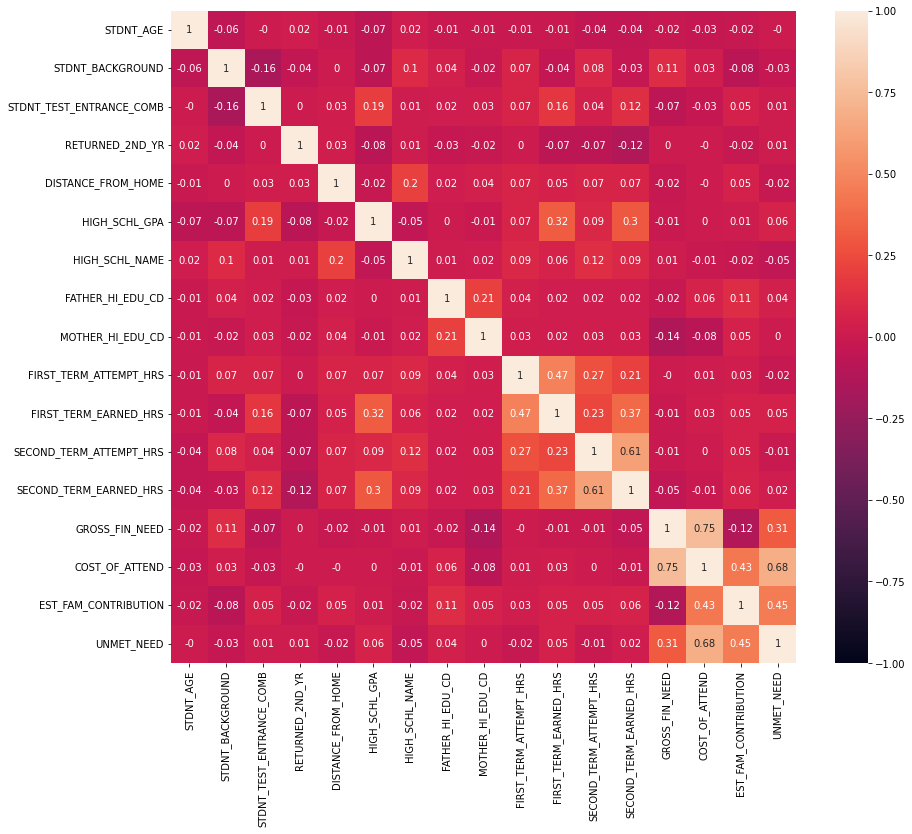

In [38]:
#Plotting correlation map

plt.subplots(figsize=(14,12))
sns.heatmap(df.corr().round(2), vmin=-1, vmax=1, annot = True)

In [39]:
#From the above map,
#1. COST_OF_ATTEND is highly correlated with GROSS_FIN_NEED & UNMET_NEED
#2. FIRST_TERM_ATTEMPT_HRS is highly correlated with FIRST_TERM_ATTEMPT_HRS
#3. SECOND_TERM_ATTEMPT_HRS is highly correlated with SECOND_TERM_ATTEMPT_HRS

#So, the columns GROSS_FIN_NEED, UNMET_NEED, FIRST_TERM_ATTEMPT_HRS and SECOND_TERM_ATTEMPT_HRS are dropped
#because of high correlation.

new_df = df.drop(['FIRST_TERM_ATTEMPT_HRS','SECOND_TERM_ATTEMPT_HRS','GROSS_FIN_NEED','UNMET_NEED'], axis=1)

In [40]:
#Splitting the dataframe into features as X and target as Y

X = new_df.drop('RETURNED_2ND_YR',axis=1)
Y = new_df['RETURNED_2ND_YR']

In [41]:
#Converting categorical columns into dummy columns

X = pd.get_dummies(X)

## Model Building:

In [42]:
#Importing the neccessary classification models and metrics

from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [43]:
#Calculating F1 score of the models

models = [LogisticRegression(solver='liblinear',multi_class='ovr'), RandomForestClassifier(), XGBClassifier(random_state=7, use_label_encoder =False, eval_metric='logloss'), DecisionTreeClassifier()]

def score_model(X, Y, estimator, **kwargs):
    model.fit(X, Y, **kwargs)
    expected  = Y
    predicted = model.predict(X)
    print(estimator.__class__.__name__, '\'s f1 score: ', round(f1_score(expected, predicted),5), sep='')

for model in models:
    score_model(X, Y, model)

LogisticRegression's f1 score: 0.00275
RandomForestClassifier's f1 score: 1.0
XGBClassifier's f1 score: 0.94538
DecisionTreeClassifier's f1 score: 1.0


In [44]:
#Spliting the features and target into training and testing data with test size of 20%

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

In [45]:
#Choosing Random forest classification and training the model

model = RandomForestClassifier(n_estimators=210, oob_score=True, n_jobs=-1, random_state=400)
model.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=210, n_jobs=-1, oob_score=True,
                       random_state=400)

In [46]:
#Predicting the target values for test set

Y_pred = model.predict(X_test)

## Model Evaluation:

In [47]:
#Printing the confusion matrix

from sklearn.metrics import confusion_matrix

print('Confusion Matrix:', confusion_matrix(Y_test, Y_pred), sep='\n')

Confusion Matrix:
[[542   9]
 [ 99  30]]


In [48]:
#Printing the classification report

from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       551
           1       0.77      0.23      0.36       129

    accuracy                           0.84       680
   macro avg       0.81      0.61      0.63       680
weighted avg       0.83      0.84      0.80       680

